<a href="https://colab.research.google.com/github/balaMantasha/AI-ML-Projects/blob/main/TITANIC_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
np.random.seed(1)

In [ ]:
titanic_data = pd.read_csv('train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

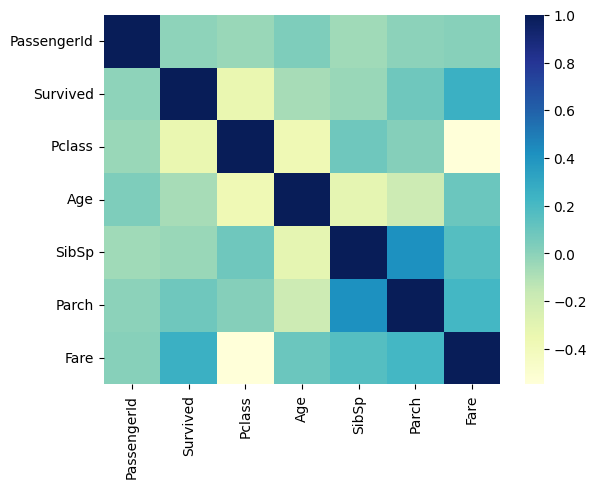

In [ ]:
numeric_data = titanic_data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, cmap="YlGnBu")

In [ ]:
#  drop columns that have negligible correlation with survival
titanic_data = titanic_data.drop(['PassengerId','Name', 'Ticket', 'Embarked' , 'Cabin'], axis=1)
# Handle missing values in 'Age' by filling with the median value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)



In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(titanic_data[['Pclass', 'Sex']])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Pclass', 'Sex']))

# Concatenate the original DataFrame (excluding the original categorical columns) with the encoded DataFrame
df = pd.concat([titanic_data.drop(['Pclass', 'Sex'], axis=1), encoded_df], axis=1)

print(df)

     Survived   Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male
0           0  22.0      1      0   7.2500       0.0       1.0       1.0
1           1  38.0      1      0  71.2833       0.0       0.0       0.0
2           1  26.0      0      0   7.9250       0.0       1.0       0.0
3           1  35.0      1      0  53.1000       0.0       0.0       0.0
4           0  35.0      0      0   8.0500       0.0       1.0       1.0
..        ...   ...    ...    ...      ...       ...       ...       ...
886         0  27.0      0      0  13.0000       1.0       0.0       1.0
887         1  19.0      0      0  30.0000       0.0       0.0       0.0
888         0  28.0      1      2  23.4500       0.0       1.0       0.0
889         1  26.0      0      0  30.0000       0.0       0.0       1.0
890         0  32.0      0      0   7.7500       0.0       1.0       1.0

[891 rows x 8 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# x consists of features and y is the target varaible
y = df['Survived']
x = df.drop(['Survived'], axis=1)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(df.dtypes)

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Pclass_2    float64
Pclass_3    float64
Sex_male    float64
dtype: object


In [ ]:
# # Scale the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Define the model
# model = Sequential()
# model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# # Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy}")

Epoch 1/50
57/57 [==============================] - 2s 9ms/step - loss: 0.6885 - accuracy: 0.6169 - val_loss: 0.5861 - val_accuracy: 0.6503
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.6274 - val_loss: 0.5188 - val_accuracy: 0.6923
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 0.5419 - accuracy: 0.7504 - val_loss: 0.4799 - val_accuracy: 0.7972
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.5082 - accuracy: 0.7961 - val_loss: 0.4506 - val_accuracy: 0.8182
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.8049 - val_loss: 0.4216 - val_accuracy: 0.8182
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8172 - val_loss: 0.4100 - val_accuracy: 0.8182
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8190 - val_loss: 0.4009 - val_accuracy: 0.8182
Epoch 8/50
57/57 [==

In [ ]:
#  Define the model and pipeline/
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1500, random_state=10))
])

In [ ]:
# Hyperparameter tuning with GridSearchCV
parameters = {
    'mlp__hidden_layer_sizes': [(10,), (20,), (30,)],
    'mlp__activation': ['relu', 'relu', 'logistic'],
    'mlp__learning_rate': ['constant', 'adaptive', 'invscaling'],
    'mlp__alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'mlp__solver': ['adam']  # Using the adam optimizer
}
from sklearn.model_selection import  GridSearchCV
cv = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(max_iter=1500,
                                                      random_state=10))]),
             param_grid={'mlp__activation': ['relu', 'relu', 'logistic'],
                         'mlp__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'mlp__hidden_layer_sizes': [(10,), (20,), (30,)],
                         'mlp__learning_rate': ['constant', 'adaptive',
                                                'invscaling'],
                         'mlp__solver': ['adam']},
             scoring='accuracy')

In [ ]:
def best(result):
    print('Best parameters: {}\n'.format(result.best_params_))
    mean = result.cv_results_['mean_test_score']
    sd = result.cv_results_['std_test_score']
    for m, s, p in zip(mean, sd, result.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(m, s*2, p))

best(cv)
print(cv.best_estimator_)

Best parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (20,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}

0.8103516202107752 (+/-0.043330766104143915) for {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (10,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
0.8103516202107752 (+/-0.043330766104143915) for {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (10,), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'adam'}
0.8103516202107752 (+/-0.043330766104143915) for {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (10,), 'mlp__learning_rate': 'invscaling', 'mlp__solver': 'adam'}
0.8145375751009555 (+/-0.053220274309336485) for {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (20,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
0.8145375751009555 (+/-0.053220274309336485) for {'mlp__activation': 'relu', 'mlp_

In [ ]:
# Fit the final model and evaluate on the test set
best_pipeline = cv.best_estimator_
best_pipeline.fit(X_train, y_train)
pred = best_pipeline.predict(X_test)
print(f'Test set accuracy: {metrics.accuracy_score(y_test, pred)}')
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

Test set accuracy: 0.8212290502793296
[[96  9]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

